In [6]:
from langchain_community.tools import YouTubeSearchTool
from langchain_community.tools import WikipediaQueryRun
from langchain_community.tools import TavilySearchResults
from langchain_community.utilities import WikipediaAPIWrapper
import os
from dotenv import load_dotenv
load_dotenv()

from langchain.agents import tool
import tiktoken

from langchain_openai import OpenAIEmbeddings
from langchain_groq import ChatGroq
from langchain_community.document_loaders import TextLoader, DirectoryLoader
from langchain_community.vectorstores import FAISS
import faiss
from langchain_community.docstore.in_memory import InMemoryDocstore
from langchain.text_splitter import RecursiveCharacterTextSplitter

import operator
from typing import List
from pydantic import BaseModel , Field
from langchain.prompts import PromptTemplate
from typing import TypedDict, Annotated, Sequence
from langchain_core.messages import BaseMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate, PromptTemplate
from langchain_core.runnables import RunnablePassthrough
from langchain_core.messages import HumanMessage, AIMessage
from langgraph.graph import StateGraph,END

from langchain.output_parsers import PydanticOutputParser

from langgraph.graph import Graph
from IPython.display import Image, display
from langchain_google_genai import ChatGoogleGenerativeAI

from langchain_core.tools import tool
from langchain_core.messages import HumanMessage, AIMessage
from langgraph.graph import StateGraph,MessagesState,START,END
from langgraph.prebuilt import ToolNode

Wikipedia Tool:

In [48]:
wiki_wrapper = WikipediaAPIWrapper(top_k_results=5, doc_content_chars_max=1000)
wiki_tool = WikipediaQueryRun(api_wrapper=wiki_wrapper)
print(wiki_tool.name, ' --> ',wiki_tool.args)
wiki_response = wiki_tool.run({'query':'Ratan Tata'})
print(wiki_response)

wikipedia  -->  {'query': {'description': 'query to look up on wikipedia', 'title': 'Query', 'type': 'string'}}
Page: Ratan Tata
Summary: Ratan Naval Tata (28 December 1937 – 9 October 2024) was an  Indian industrialist and philanthropist. He served as the chairman of Tata Group and Tata Sons from 1991 to 2012 and he held the position of interim chairman from October 2016 to February 2017. In 2000, he received the Padma Bhushan, the third highest civilian honour in India, followed by the Padma Vibhushan, the country's second highest civilian honour, in 2008.
Ratan Tata was the son of Naval Tata, who was adopted by Ratanji Tata, son of Jamshedji Tata, the founder of the Tata Group. He graduated from Cornell University College of Architecture with a bachelor's degree in architecture. He had also attended the Harvard Business School (HBS) Advanced Management program in 1975. He joined the Tata Group in 1962, starting on the shop floor of Tata Steel. He later succeeded J. R. D. Tata as cha

Youtube Search Tool:

In [49]:
youtube_tool = YouTubeSearchTool()
print(youtube_tool.name , '--> ', youtube_tool.args)
youtube_response = youtube_tool.run('Ratan Tata')
print(youtube_response)

youtube_search -->  {'query': {'title': 'Query', 'type': 'string'}}
['https://www.youtube.com/shorts/Zfd92TBs3os', 'https://www.youtube.com/shorts/_RXNfScuaxI']


Tavily Tool:

In [7]:
tavily_api_key = os.getenv('TAVILY_API_KEY')

In [51]:
tavily_tool = TavilySearchResults(tavily_api_key=tavily_api_key)
print(tavily_tool.name, '-->', tavily_tool.description, '--> ', tavily_tool.args)
tavily_res = tavily_tool.invoke('Which flight crashed in India recenty?')
print(tavily_res)

C:\Users\Namrata Thakur\AppData\Local\Temp\ipykernel_11060\3678803618.py:1: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  tavily_tool = TavilySearchResults(tavily_api_key=tavily_api_key)


tavily_search_results_json --> A search engine optimized for comprehensive, accurate, and trusted results. Useful for when you need to answer questions about current events. Input should be a search query. -->  {'query': {'description': 'search query to look up', 'title': 'Query', 'type': 'string'}}
[{'title': 'U.S. Investigators Arrive at Scene of Plane Crash in India', 'url': 'https://www.nytimes.com/2025/06/16/world/asia/air-india-plane-crash-investigation-us.html', 'content': 'At least 270 people, including 241 passengers on an Air India flight bound for London Gatwick Airport from the city of Ahmedabad, in the western Indian state of Gujarat, died last week as a Boeing 787-8 Dreamliner plane [smashed into buildings](https://www.nytimes.com/2025/06/12/world/asia/india-plane-crash-what-to-know.html) including the dining hall of a medical college.\n\nAdvertisement', 'score': 0.8548001}, {'title': 'Air India jet crash kills 246 people, with at least 1 passenger ...', 'url': 'https://a

In [ ]:
tavily_res[0]['content']

'At least 270 people, including 241 passengers on an Air India flight bound for London Gatwick Airport from the city of Ahmedabad, in the western Indian state of Gujarat, died last week as a Boeing 787-8 Dreamliner plane [smashed into buildings](https://www.nytimes.com/2025/06/12/world/asia/india-plane-crash-what-to-know.html) including the dining hall of a medical college.\n\nAdvertisement'

In [53]:
tavily_tool.invoke({"query":"what happend in RCB victory celebration?"})

[{'title': "Bengaluru stampede case: What we know so far on RCB's ...",
  'url': 'https://timesofindia.indiatimes.com/sports/cricket/ipl/top-stories/bengaluru-stampede-case-what-we-know-so-far-on-rcbs-celebrations-that-turned-catastrophic/articleshow/121670873.cms',
  'content': "[Follow us](https://news.google.com/publications/CAAqBwgKMM6y_Qowwu70Ag)\n\nRoyal Challengers Bengaluru's IPL victory celebrations turned tragic as a stampede at M Chinnaswamy Stadium resulted in 11 deaths and 75 injuries. FIRs have been filed against RCB, events organisers DNA, and Karnataka State Cricket Association for alleged negligence. The Karnataka High Court has sought a report from the government while arrests have been and officials suspended.\n\nRead More [...] [](https://timesofindia.indiatimes.com/city/bengaluru/celebrations-turn-tragic-bloodbath-at-rcbs-maiden-ipl-trophy-victory-day-to-remember-forever-see-pics/photostory/121646177.cms)[Celebrations turn tragic: Bloodbath at RCB’s maiden IPL trop

Custom Tool:

In [54]:
@tool
def get_token_count(sentence:str):
    '''
    This tool gets the number of tokens present in a text.
    '''
    tokenizer = tiktoken.get_encoding('gpt2')
    l_tok = tokenizer.encode(sentence)
    return len(l_tok)  ,   l_tok

In [55]:
print(get_token_count.name, '--> ', get_token_count.description, '--> ', get_token_count.args)
customTool_res = get_token_count.invoke('Taylor Swift.')
print(customTool_res[0], '-->', customTool_res[1])

get_token_count -->  This tool gets the number of tokens present in a text. -->  {'sentence': {'title': 'Sentence', 'type': 'string'}}
3 --> [29907, 15608, 13]


Langgraph Introduction:

In [3]:
model = ChatGoogleGenerativeAI(model='gemini-1.5-flash', temperature=0.0)
print(model.invoke('Say a few words about gemini-1.5-flash model.').content)

Gemini-1.5-flash is a large language model from Google, a successor to Gemini-1.  It's notable for its improved performance across various benchmarks compared to its predecessor, particularly in reasoning and coding tasks.  While specific details are limited in public documentation, it represents a significant step forward in Google's Gemini family of models.


In [58]:
def get_llm_response(input:str):
    response = model.invoke(input)
    return response.content

def count_tokens(llm_op:str):
    tokens = llm_op.split()
    print(llm_op)
    return f"total token number in the generated answer is {len(tokens)}"

In [59]:
workflow = Graph()
workflow.add_node('LLM Input', get_llm_response)
workflow.add_node('Token Count', count_tokens)
workflow.set_entry_point('LLM Input')
workflow.add_edge('LLM Input', 'Token Count')
workflow.set_finish_point('Token Count')

graph = workflow.compile()

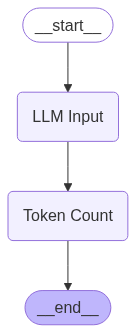

In [60]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [61]:
#Getting output from the graph:
graph_response = graph.invoke('Tell me something about BTS!')
print(graph_response)

BTS, also known as Bangtan Sonyeondan or Beyond the Scene, is a hugely popular South Korean boy band that debuted in 2013.  They're known for their self-produced music, intricate choreography, and strong connection with their global fanbase, known as ARMY.  Their music blends various genres, including hip-hop, R&B, and pop, often incorporating socially conscious themes and personal narratives.  Beyond their musical achievements, they've become significant cultural icons, influencing fashion, social media trends, and even impacting conversations about mental health.
total token number in the generated answer is 79


In [62]:
#Getting output of each node in the graph:
query = 'Tell me something about BTS!'
for output in graph.stream(query):
    for key, value in output.items():
        print(f'Output from NODE : {key}...')
        print(value)
        print('--------------------------------------------------------')

Output from NODE : LLM Input...
BTS, also known as Bangtan Sonyeondan or Beyond the Scene, is a hugely popular South Korean boy band that debuted in 2013.  They're known for their self-produced music, intricate choreography, and strong connection with their global fanbase, known as ARMY.  Their music blends various genres, including hip-hop, R&B, and pop, often incorporating socially conscious themes and messages of self-love and acceptance.  They've achieved numerous record-breaking milestones, including topping Billboard charts and selling millions of albums worldwide.
--------------------------------------------------------
BTS, also known as Bangtan Sonyeondan or Beyond the Scene, is a hugely popular South Korean boy band that debuted in 2013.  They're known for their self-produced music, intricate choreography, and strong connection with their global fanbase, known as ARMY.  Their music blends various genres, including hip-hop, R&B, and pop, often incorporating socially conscious 

### Langgraph with VectorDB

#### Use Case: RAG as a node in the langgraph

In [4]:
openai_key = os.getenv('OPENAI_API_KEY')

openai_emb = OpenAIEmbeddings(api_key=openai_key, model='text-embedding-3-large')
demo_emb= openai_emb.embed_query("Hello, this is a demo testing.")
print(len(demo_emb))

3072


In [41]:
#Step 1: Data Ingestion: Get the loader for loading the text file:
loader = DirectoryLoader(path='./data', glob='./*.txt', loader_cls=TextLoader)

#Get the text file from the directory:
docs = loader.load()
print(docs)
print('--------------------')
print(len(docs))
print('------------------------')
print(docs[0].metadata)
print('------------------------')
#print(docs[0].page_content)

#Step 2: Data Transformation: Split the document using text splitter
splitter = RecursiveCharacterTextSplitter(chunk_size = 500, chunk_overlap = 50)
docs_split = splitter.split_documents(documents=docs)
print('Total Chunks: ',len(docs_split))
print('-------------------------------------------------------')

#Step 3: Get only the page_content of each chunks for embedding --> Only to understand how langchain is getting the chunks for embedding
docs_content = [doc.page_content for doc in docs_split] 
# print(docs_content[50]) 
print(len(docs_content))
print('-------------------------------------------------------')

#Step 4: Load the chunks into the Chroma DB: Define the Retriever part of RAG: --> Chroma has an issue with Python 3.11, need to use Python 3.10
#db = Chroma(collection_name='taylorSwift', embedding_function=openai_emb)
# chroma_db = Chroma.from_documents(documents=docs_split, embedding= openai_emb)
# chroma_retriever = chroma_db.as_retriever(search_kwargs={'k':3, 'score_threshold': 0.7}, 
#                                           search_type='similarity_score_threshold')

#Step 4: Create the Faiss Index with openAI's embedding dimension:
index=faiss.IndexFlatL2(len(demo_emb))
print('Faiss Index Created..!')
print('-------------------------------------------------------')

#Step 5: Load the chunks into the FAISS DB: Define the Retriever part of RAG:
vector_store=FAISS(
    embedding_function=openai_emb,
    index=index,
    docstore=InMemoryDocstore(),
    index_to_docstore_id={},
)

print('Vector Store Created..!!')
print('-------------------------------------------------------')

vector_store.add_documents(documents=docs_split)
print('Chunks Loaded in FAISS')
print('-------------------------------------------------------')

faiss_retriever = vector_store.as_retriever(search_kwargs={'k':3}) #'score_threshold': 0.3}, search_type='similarity_score_threshold')

print('Retriever Created ..!')
print('-------------------------------------------------------')

[Document(metadata={'source': 'data\\taylorswift.txt'}, page_content='Copy paste of the Wikipedia article on Taylor Swift, as of Feb 16, 2024.\n---\n\nMain menu\n\nWikipediaThe Free Encyclopedia\n\nSearch\nCreate account\nLog in\n\nPersonal tools\nContents  hide\n(Top)\nLife and career\nToggle Life and career subsection\nArtistry\nToggle Artistry subsection\nAccolades and achievements\nCultural status\nToggle Cultural status subsection\nWealth\nToggle Wealth subsection\nDiscography\nFilmography\nTours\nSee also\nFootnotes\nReferences\nToggle References subsection\nExternal links\nTaylor Swift\n\n136 languages\nArticle\nTalk\nRead\nView source\nView history\n\nTools\n Featured article\nPage semi-protected\nFrom Wikipedia, the free encyclopedia\nFor the album, see Taylor Swift (album).\nTaylor Swift\nPortrait of Taylor Swift in a cocktail dress\nSwift at the 2023 MTV Video Music Awards\nBorn\tTaylor Alison Swift\nDecember 13, 1989 (age 34)\nWest Reading, Pennsylvania, US\nOccupations\nSi

In [45]:
#Test the retriever:
ret_res= faiss_retriever.invoke('taylor swift most popular album')
print(ret_res)

ret_res= faiss_retriever.invoke('industrial growth of usa?')
print(ret_res)

[Document(id='5a5e2c31-a38e-447a-8a47-e755fd8a8630', metadata={'source': 'data\\taylorswift.txt'}, page_content='electronic elements and featured Swift\'s first Billboard Hot 100 number-one song, "We Are Never Ever Getting Back Together". She departed from her country image with 1989 (2014), a synth-pop album supported by the chart-topping songs "Shake It Off", "Blank Space", and "Bad Blood". Media scrutiny inspired the hip-hop-influenced Reputation (2017) and its number-one single "Look What You Made Me Do".'), Document(id='59d7292f-f30a-4576-a92d-362d9183c553', metadata={'source': 'data\\taylorswift.txt'}, page_content='were the top-10 single "Lover", the top-40 single "The Man",[57] and the 2023 resurgent success, chart topper "Cruel Summer".[205] Lover was the world\'s best-selling album by a solo artist of 2019,[206] and along with its singles earned nominations at the 62nd Annual Grammy Awards in 2020.[207] At the 2019 MTV Video Music Awards, "Me!" won Best Visual Effects, and "Y

In [ ]:
#Save the Faiss index on the disk:
vector_store.save_local("taylowSwift_US_faiss")

In [8]:
#Load the Faiss index from the disk:
faiss_index_loaded = FAISS.load_local(
                                "taylowSwift_US_faiss",openai_emb ,allow_dangerous_deserialization=True
                          )


#Test the retriever: "invoke" method is available for the index that is defined using ".as_retriever"
#So to test just the index, we use ".similarity_search()"
print(faiss_index_loaded.similarity_search('taylor swift most popular album'),'\n')

#Test the retriever: "invoke" method is available for the index that is defined using ".as_retriever"
#Converting the loaded index to retriever:
faiss_retriever_loaded = faiss_index_loaded.as_retriever(search_kwargs={'k':3})
print(faiss_retriever_loaded.invoke('economic growth of usa?'))


[Document(id='eed6dc61-54e8-4e04-b613-bf6b0441e45e', metadata={'source': 'data\\taylorswift.txt'}, page_content='electronic elements and featured Swift\'s first Billboard Hot 100 number-one song, "We Are Never Ever Getting Back Together". She departed from her country image with 1989 (2014), a synth-pop album supported by the chart-topping songs "Shake It Off", "Blank Space", and "Bad Blood". Media scrutiny inspired the hip-hop-influenced Reputation (2017) and its number-one single "Look What You Made Me Do".'), Document(id='e7d62317-9586-421a-ba17-cd6d661c8484', metadata={'source': 'data\\taylorswift.txt'}, page_content='were the top-10 single "Lover", the top-40 single "The Man",[57] and the 2023 resurgent success, chart topper "Cruel Summer".[205] Lover was the world\'s best-selling album by a solo artist of 2019,[206] and along with its singles earned nominations at the 62nd Annual Grammy Awards in 2020.[207] At the 2019 MTV Video Music Awards, "Me!" won Best Visual Effects, and "Y

##### Creating the State and the Workflow:

Use Case: Given a user query, the supervisor node will first determine if the user query is related to Taylor Swift or USA, if yes it will route to the RAG Node (containing the index populated with docs related to these two topics). If no, the supervisor node will do an LLM call to answer the user query.

We can create our custom State class or use the pre-defined one given in Langgraph. For now, we are using our custom State class.

In [11]:
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]

Steps:
    
    a) Define a pydantic class to be used for parsing the output of of the supervisor node into structured format
    b) Create the function for the supervisor. Convert this function to node (later)
    c) Create the function for RAG call. Convert this function to a node (later)
    d) Create the function for LLM Call. Convert this function to a node (later)
    e) Create the function for the routing logic
    f) Combine all of the above into a graph with conditional edges and router

In [14]:
#Step A:
class TopicParser(BaseModel):
    topic: str = Field(description="topic selected")
    reasoning: str = Field(description="reasoning behind the selection")

parser = PydanticOutputParser(pydantic_object=TopicParser)

In [79]:
#Step B:
def supervisor_block(state : AgentState):
    
    print('****************** STAGE: SUPERVISOR ******************')
    question = state['messages'][-1]
    print("Question : ", question)

    template = """
    Your task is to classify the given user query into one of the following categories: [USA, Taylor Swift, Not Related]
    Output only the category and nothing else.

    User Query: {query}
    {format_instruction}
    """
    prompt = PromptTemplate(template = template, input_variables=['query'], 
                            partial_variables={'format_instruction' : parser.get_format_instructions()})

    chain = prompt | model | parser

    res = chain.invoke({'query': question})

    print('Response : ', res)

    return {"messages": [res.topic]}

In [80]:
#Test out the supervisor function:
state={"messages":["what is a GDP of usa??"]}
print(supervisor_block(state))

state={"messages":["what is a today weather?"]}
print(supervisor_block(state))

state={"messages":["what is taylor swift's most famous album?"]}
print(supervisor_block(state))

****************** STAGE: SUPERVISOR ******************
Question :  what is a GDP of usa??
Response :  topic='USA' reasoning='The query explicitly asks about the GDP of the USA.'
{'messages': ['USA']}
****************** STAGE: SUPERVISOR ******************
Question :  what is a today weather?
Response :  topic='Not Related' reasoning='The query is about weather, which is unrelated to USA or Taylor Swift.'
{'messages': ['Not Related']}
****************** STAGE: SUPERVISOR ******************
Question :  what is taylor swift's most famous album?
Response :  topic='Taylor Swift' reasoning='The query explicitly mentions Taylor Swift and asks about her album.'
{'messages': ['Taylor Swift']}


In [56]:
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

In [ ]:
#Test the retriver once again:
faiss_retriever_loaded.invoke('What is the gdp of usa?')

[Document(id='4f0e80df-3a20-48e1-9157-1df5b264c1c5', metadata={'source': 'data\\usa.txt'}, page_content='As of 2024, the United States’ nominal GDP is estimated to be around $28 trillion USD, accounting for approximately 25% of the global economy. It ranks #1 in the world by nominal GDP, far ahead of China (which ranks 2nd). The U.S. GDP per capita is also among the highest, hovering around $83,000, which indicates a high standard of living and productivity. In terms of Purchasing Power Parity (PPP), the U.S. ranks second, but nominal GDP is considered more reflective of actual economic size and'),
 Document(id='b6dc6e7d-24ac-47c9-8741-a3ee9cfc4f44', metadata={'source': 'data\\usa.txt'}, page_content='The United States of America possesses the largest economy in the world in terms of nominal GDP, making it the most powerful economic force globally. It operates under a capitalist mixed economy, where the private sector dominates, but the government plays a significant regulatory and fis

In [ ]:
#Step C: 
def rag_block(state : AgentState):
    print('****************** STAGE: RAG ******************')
    question = state['messages'][0]
    print(state)
    print(question)
    template = """
        You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. 
        If you don't know the answer, just say that you don't know. 
        Use three sentences maximum and keep the answer concise.\nQuestion: {query} \nContext: {context} \nAnswer:"""

    prompt= PromptTemplate(template=template, input_variables=['context','query'])

    rag_chain = (
        {'context' : faiss_retriever_loaded | format_docs, 'query' : RunnablePassthrough()}
        | prompt
        | model 
        | StrOutputParser()
    )

    res = rag_chain.invoke(question)

    return {"messages": [res]}

In [ ]:
#Step D:
def llm_block(state : AgentState):
    print('****************** STAGE: LLM ******************')
    question = state['messages'][0]

    complete_query = "Anwer the follow question with your knowledge of the real world. Following is the user question: " + question
    res = model.invoke(complete_query)

    return {"messages": [res.content]}

In [59]:
#Step E:
def routing_block(state : AgentState):

    print('****************** STAGE: ROUTER ******************')
    supervisor_res = state['messages'][-1]

    if 'usa' in supervisor_res.lower() or 'taylor swift' in supervisor_res.lower():
        return "RAG Call"
    else:
        return "LLM Call"

In [83]:
#Step F:
workflow = StateGraph(AgentState)
workflow.add_node("Supervisor Block", supervisor_block)
workflow.add_node("RAG Block", rag_block)
workflow.add_node("LLM Block", llm_block)
workflow.set_entry_point("Supervisor Block")
workflow.add_conditional_edges(source= "Supervisor Block", 
                               path= routing_block, 
                               path_map={'RAG Call' : 'RAG Block', 
                                         'LLM Call' : 'LLM Block'}
                               )
workflow.add_edge("RAG Block", END)
workflow.add_edge("LLM Block", END)

graph = workflow.compile()

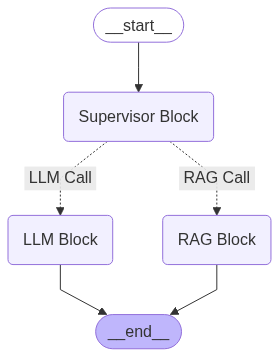

In [52]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [84]:
#Test out the graph:
print('----------------------------------------------------------------------')
state={"messages":["what is a gdp of usa?"]}
print(graph.invoke(state))
print('----------------------------------------------------------------------')
state={"messages":["how popular is taylow swift in India?"]}
print(graph.invoke(state))
print('----------------------------------------------------------------------')
state={"messages":["which is the most famous K-POP male group right now?"]}
print(graph.invoke(state))
print('----------------------------------------------------------------------')

----------------------------------------------------------------------
****************** STAGE: SUPERVISOR ******************
Question :  what is a gdp of usa?
Response :  topic='USA' reasoning='The query explicitly asks about the GDP of the USA.'
****************** STAGE: ROUTER ******************
****************** STAGE: RAG ******************
{'messages': ['what is a gdp of usa?', 'USA']}
what is a gdp of usa?
{'messages': ['what is a gdp of usa?', 'USA', "The nominal GDP of the USA is approximately $28 trillion USD as of 2024.  This makes it the world's largest economy by nominal GDP.  It accounts for roughly 25% of the global economy."]}
----------------------------------------------------------------------
****************** STAGE: SUPERVISOR ******************
Question :  how popular is taylow swift in India?
Response :  topic='Taylor Swift' reasoning="The query explicitly asks about Taylor Swift's popularity in India."
****************** STAGE: ROUTER ******************
*****

#### Use Case: Tool Calling: Workflow with Single Tool

Use case: Bind the LLM with a tool so that when a user query come, the LLM doesnt answer it on its own. Rather it uses the tool to give the output.

In [5]:
groq_api_key = os.getenv('GROQ_API_KEY')
model_name = "deepseek-r1-distill-llama-70b"
model = ChatGroq(api_key=groq_api_key, model=model_name, temperature=0)
print(model.invoke('Tell me something about yourself.').content)

<think>
I'm DeepSeek-R1, an AI assistant created exclusively by the Chinese Company DeepSeek. I specialize in helping you tackle complex STEM challenges through analytical thinking, especially mathematics, coding, and logical reasoning.
</think>

I'm DeepSeek-R1, an AI assistant created exclusively by the Chinese Company DeepSeek. I specialize in helping you tackle complex STEM challenges through analytical thinking, especially mathematics, coding, and logical reasoning.


Steps:
    
    a) Create a tool with the Tavily Search API
    b) Bind the LLM with the tool
    c) Add the tool as a Node in the workflow graph
    d) Create the router function
    e) Combine all of the above into a graph

In [9]:
tavily_tool = TavilySearchResults(tavily_api_key=tavily_api_key)
print(tavily_tool.name, '-->', tavily_tool.description, '--> ', tavily_tool.args)

tavily_search_results_json --> A search engine optimized for comprehensive, accurate, and trusted results. Useful for when you need to answer questions about current events. Input should be a search query. -->  {'query': {'description': 'search query to look up', 'title': 'Query', 'type': 'string'}}


C:\Users\Namrata Thakur\AppData\Local\Temp\ipykernel_7764\1492328921.py:1: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  tavily_tool = TavilySearchResults(tavily_api_key=tavily_api_key)


In [78]:
#Step A:

@tool
def tavily_search(query : str):
    """
    The tool uses the input query to search the web using Tavily Search API
    """
    tavily_res = tavily_tool.invoke(query)
    return tavily_res[0]['content']

In [79]:
#Step B

#Testing the model response before binding the tool:
res = model.invoke('What is the average temperature in delhi?')
print(res.content)
print('==============================================================================================================================================================')

#Binding the tool with the model:
search_tool = [tavily_search]
model_with_tool = model.bind_tools(search_tool)
res = model_with_tool.invoke('What is the average temperature in delhi?')
print(res.content)
print(res.tool_calls)
print('==============================================================================================================================================================')

<think>
Okay, so I need to figure out the average temperature in Delhi. I'm not exactly sure where to start, but I'll try to break it down step by step. First, I know that Delhi is a city in India, and India has a varied climate, so I guess Delhi's climate might be different from other parts of the country.

I remember hearing that Delhi has really hot summers and pretty cool winters. Maybe it's a type of continental climate? I think that's what they call it when there's a big difference between summer and winter temperatures. So, if that's the case, the average temperature would vary a lot throughout the year.

I should probably consider the different seasons. Let's see, summer in Delhi is from April to October, I think. During these months, it gets really hot, especially in May and June. I've heard about heatwaves where the temperature can go above 40°C (104°F). That's pretty extreme. Then, the monsoon season starts around July and goes into August and September, bringing a lot of ra

In [80]:
#Step B (final):
def llm_block(state : MessagesState):
    query = state['messages']
    res= model_with_tool.invoke(query)
    return {'messages' : [res]}

In [81]:
#Step C:
search_tool_node = ToolNode(search_tool)
search_tool_node

tools(tags=None, recurse=True, explode_args=False, func_accepts_config=True, func_accepts={'store': ('__pregel_store', None)}, tools_by_name={'tavily_search': StructuredTool(name='tavily_search', description='The tool uses the input query to search the web using Tavily Search API', args_schema=<class 'langchain_core.utils.pydantic.tavily_search'>, func=<function tavily_search at 0x000001DEA8FBAF80>)}, tool_to_state_args={'tavily_search': {}}, tool_to_store_arg={'tavily_search': None}, handle_tool_errors=True, messages_key='messages')

In [102]:
#Step D:
def routing_block(state : MessagesState):
    message = state['messages'][-1]
    if message.tool_calls:
        print("Tool Calling Step..!")
        return "tool call"
    else:
        return END

In [103]:
#Step E:
workflow = StateGraph(MessagesState)
workflow.add_node("LLM Block", llm_block)
workflow.add_node("Tool Block", search_tool_node)
workflow.set_entry_point("LLM Block")
workflow.add_conditional_edges("LLM Block", path= routing_block, 
                               path_map={
                                   "tool call": "Tool Block",
                                    END:END
                                   }
                              )
#workflow.add_edge("Tool Block","LLM Block")
graph = workflow.compile()


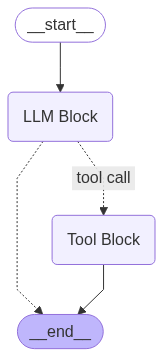

In [105]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [106]:
response=graph.invoke({"messages":["what is a weather in bengraluru?"]})
response

Tool Calling Step..!


{'messages': [HumanMessage(content='what is a weather in bengraluru?', additional_kwargs={}, response_metadata={}, id='e39dfb44-aab8-4396-b0a9-cb816cc60275'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'cyz3m18sp', 'function': {'arguments': '{"query":"Bengaluru weather"}', 'name': 'tavily_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 171, 'prompt_tokens': 145, 'total_tokens': 316, 'completion_time': 0.799808079, 'prompt_time': 0.016950525, 'queue_time': 0.05314726499999999, 'total_time': 0.816758604}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--4974e5a9-99e0-4407-8c03-327a3bc9b324-0', tool_calls=[{'name': 'tavily_search', 'args': {'query': 'Bengaluru weather'}, 'id': 'cyz3m18sp', 'type': 'tool_call'}], usage_metadata={'input_tokens': 145, 'output_tokens': 171, 'total_tokens': 316}),
  ToolMessage(content='cloudy](https://r

In [107]:
#Test out the graph:
print('----------------------------------------------------------------------')
state={"messages":["What is the average temperature in delhi?"]}
response = graph.invoke(state)
print(response["messages"][-1].content)
print('\n----------------------------------------------------------------------\n')
state={"messages":["Important news from Indore"]}
response = graph.invoke(state)
print(response["messages"][-1].content)
print('----------------------------------------------------------------------\n')
state={"messages":["which is the most famous K-POP male group right now?"]}
response = graph.invoke(state)
print(response["messages"][-1].content)
print('----------------------------------------------------------------------')

----------------------------------------------------------------------
Tool Calling Step..!
rain. The average temperatures are around 29 °C (84 °F), although they can vary from around 25 °C (77 °F) on rainy days to 35–40 °C (95–104 °F) during dry spells. The monsoons recede in late September, and the post-monsoon season continues till late October, with average temperatures sliding from 29 to 21 °C (84 to 70 °F). [...] (109.0) | 45.9  
(114.6) | 45.6  
(114.1) | 41.5  
(106.7) | 38.3  
(100.9) | 37.2  
(99.0) | 36.2  
(97.2) | 32.2  
(90.0) | 27.7  
(81.9) | 46.2  
(115.2) |
| Mean daily maximum °C (°F) | 19.2  
(66.6) | 24.3  
(75.7) | 30.7  
(87.3) | 36.8  
(98.2) | 41.2  
(106.2) | 40.5  
(104.9) | 35.7  
(96.3) | 34.3  
(93.7) | 34.2  
(93.6) | 33.4  
(92.1) | 28.3  
(82.9) | 22.2  
(72.0) | 31.7  
(89.1) |
| Mean daily minimum °C (°F) | 7.7  
(45.9) | 11.0  
(51.8) | 15.4  
(59.7) | 21.0 [...] (69.8) | 25.5  
(77.9) | 27.1  
(80.8) | 26.5  
(79.7) | 25.8  
(78.4) | 24.2  
(75.6) |

Adding another edge from tool call block to llm block again to get better AI generated better.

In [108]:
workflow.add_edge("Tool Block","LLM Block")
graph = workflow.compile()

Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.


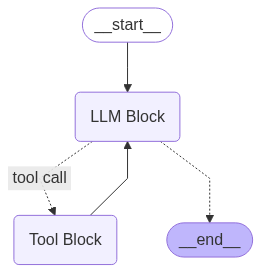

In [109]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [110]:
response=graph.invoke({"messages":["what is a weather in bengraluru?"]})
response

Tool Calling Step..!


{'messages': [HumanMessage(content='what is a weather in bengraluru?', additional_kwargs={}, response_metadata={}, id='24050471-89fb-44f7-8761-b529e78b2508'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'z48n0hbtp', 'function': {'arguments': '{"query":"Bengaluru weather"}', 'name': 'tavily_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 171, 'prompt_tokens': 145, 'total_tokens': 316, 'completion_time': 0.726180164, 'prompt_time': 0.009262397, 'queue_time': 0.053276343, 'total_time': 0.735442561}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--6af209cb-f706-4a76-b9c7-38c45e942b5b-0', tool_calls=[{'name': 'tavily_search', 'args': {'query': 'Bengaluru weather'}, 'id': 'z48n0hbtp', 'type': 'tool_call'}], usage_metadata={'input_tokens': 145, 'output_tokens': 171, 'total_tokens': 316}),
  ToolMessage(content='cloudy](https://res.weath

In [112]:
response=graph.invoke({"messages":["which is the most famous K-POP male group in 2025?"]})
response

{'messages': [HumanMessage(content='which is the most famous K-POP male group in 2025?', additional_kwargs={}, response_metadata={}, id='a56dbbe2-02f4-488e-b4d5-220151a0b87e'),
  AIMessage(content='The most famous K-POP male group in 2025 is likely to be Stray Kids or TOMORROW X TOGETHER, based on their rising popularity and influence. However, BTS may still be leading if they continue their successful streak.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 536, 'prompt_tokens': 150, 'total_tokens': 686, 'completion_time': 2.4932973560000002, 'prompt_time': 0.016466059, 'queue_time': 0.053688374999999997, 'total_time': 2.509763415}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--e20cf50d-13c6-42c3-a4fc-d0cc5d9b7911-0', usage_metadata={'input_tokens': 150, 'output_tokens': 536, 'total_tokens': 686})]}

Sometimes, the LLM doesnt call the tool even after we have binded the tool with the LLM. This happens if LLM has the inherent knowledge to give the info directly! As seen above. But again, on multiple runs we see that it is calling the tool too (sometimes). This behavior is seen for the above query.

Testing the workflow:

In [113]:
#Test out the graph:
print('----------------------------------------------------------------------')
state={"messages":["What is the average temperature in delhi?"]}
response = graph.invoke(state)
print(response["messages"][-1].content)
print('\n----------------------------------------------------------------------\n')
state={"messages":["Important news from Indore"]}
response = graph.invoke(state)
print(response["messages"][-1].content)
print('----------------------------------------------------------------------\n')
state={"messages":["which is the most famous K-POP male group right now?"]}
response = graph.invoke(state)
print(response["messages"][-1].content)
print('----------------------------------------------------------------------')

----------------------------------------------------------------------
Tool Calling Step..!
The average temperature in Delhi varies throughout the year due to its diverse climate. Here's a breakdown by season:

- **Summer (April to June):** Temperatures often reach 40°C, sometimes exceeding during heatwaves.
- **Monsoon (July to September):** Average temperature is around 29°C, with increased humidity.
- **Post-Monsoon (October to November):** Cooler, averaging around 25°C.
- **Winter (December to February):** Temperatures can drop to 10-15°C, sometimes lower.

Overall, the average temperature in Delhi is around the mid-20s Celsius, but significant seasonal variations exist.

----------------------------------------------------------------------

Tool Calling Step..!
Here is a summary of the important news from Indore:

1. **Indore Man Inspired by Tamil Film Attempts to Inject Woman with Infected Blood**  
   - A man in Indore was arrested for attempting to inject a woman with infected

In [114]:
#Test out the graph:
print('----------------------------------------------------------------------')
state={"messages":["What is the average temperature in delhi?"]}
response = graph.invoke(state)
print(response["messages"][-1].content)
print('\n----------------------------------------------------------------------\n')
state={"messages":["Important news from Indore"]}
response = graph.invoke(state)
print(response["messages"][-1].content)
print('----------------------------------------------------------------------\n')
state={"messages":["which is the most famous K-POP male group right now?"]}
response = graph.invoke(state)
print(response["messages"][-1].content)
print('----------------------------------------------------------------------')

----------------------------------------------------------------------
Tool Calling Step..!
The average temperature in Delhi varies throughout the year due to its humid subtropical climate. Here's a breakdown of the average temperatures and extremes:

### Average Temperatures:
- **Annual Average**: Around 29°C (84°F).
- **Monsoon Season (July to September)**: Average temperatures are around 29°C (84°F), with cooler days during rain (around 25°C or 77°F) and hotter days during dry spells (up to 35–40°C or 95–104°F).
- **Post-Monsoon (October)**: Temperatures gradually decrease from 29°C (84°F) to 21°C (70°F) by late October.

### Extreme Temperatures:
- **Record Low**: The lowest recorded temperature in Delhi was −1.3°C (29.7°F) in January.
- **Summer Heat**: During peak summer, temperatures can soar to 40°C (104°F) or higher.

This data provides a clear picture of Delhi's climate, showing significant variations between seasons and the potential for extreme heat and cold.

-------------

Above we are running 3 queries two times. The first 2 query is hitting the tool call both times. The 3rd query is hitting the tool once and using the LLM only in the next run.


Conclusion: If the query is related to current weather, news (or anything dynamic that is not inherently present in the LLM training info) then tool call is happening every time. If the question is bit generic (bit, not entirely generic) then LLM can skip tool call and give answer directly.